In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_excel('iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data['Classification'].nunique()

3

In [8]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [9]:
data['Classification'].value_counts(normalize = True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [10]:
data.shape

(150, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

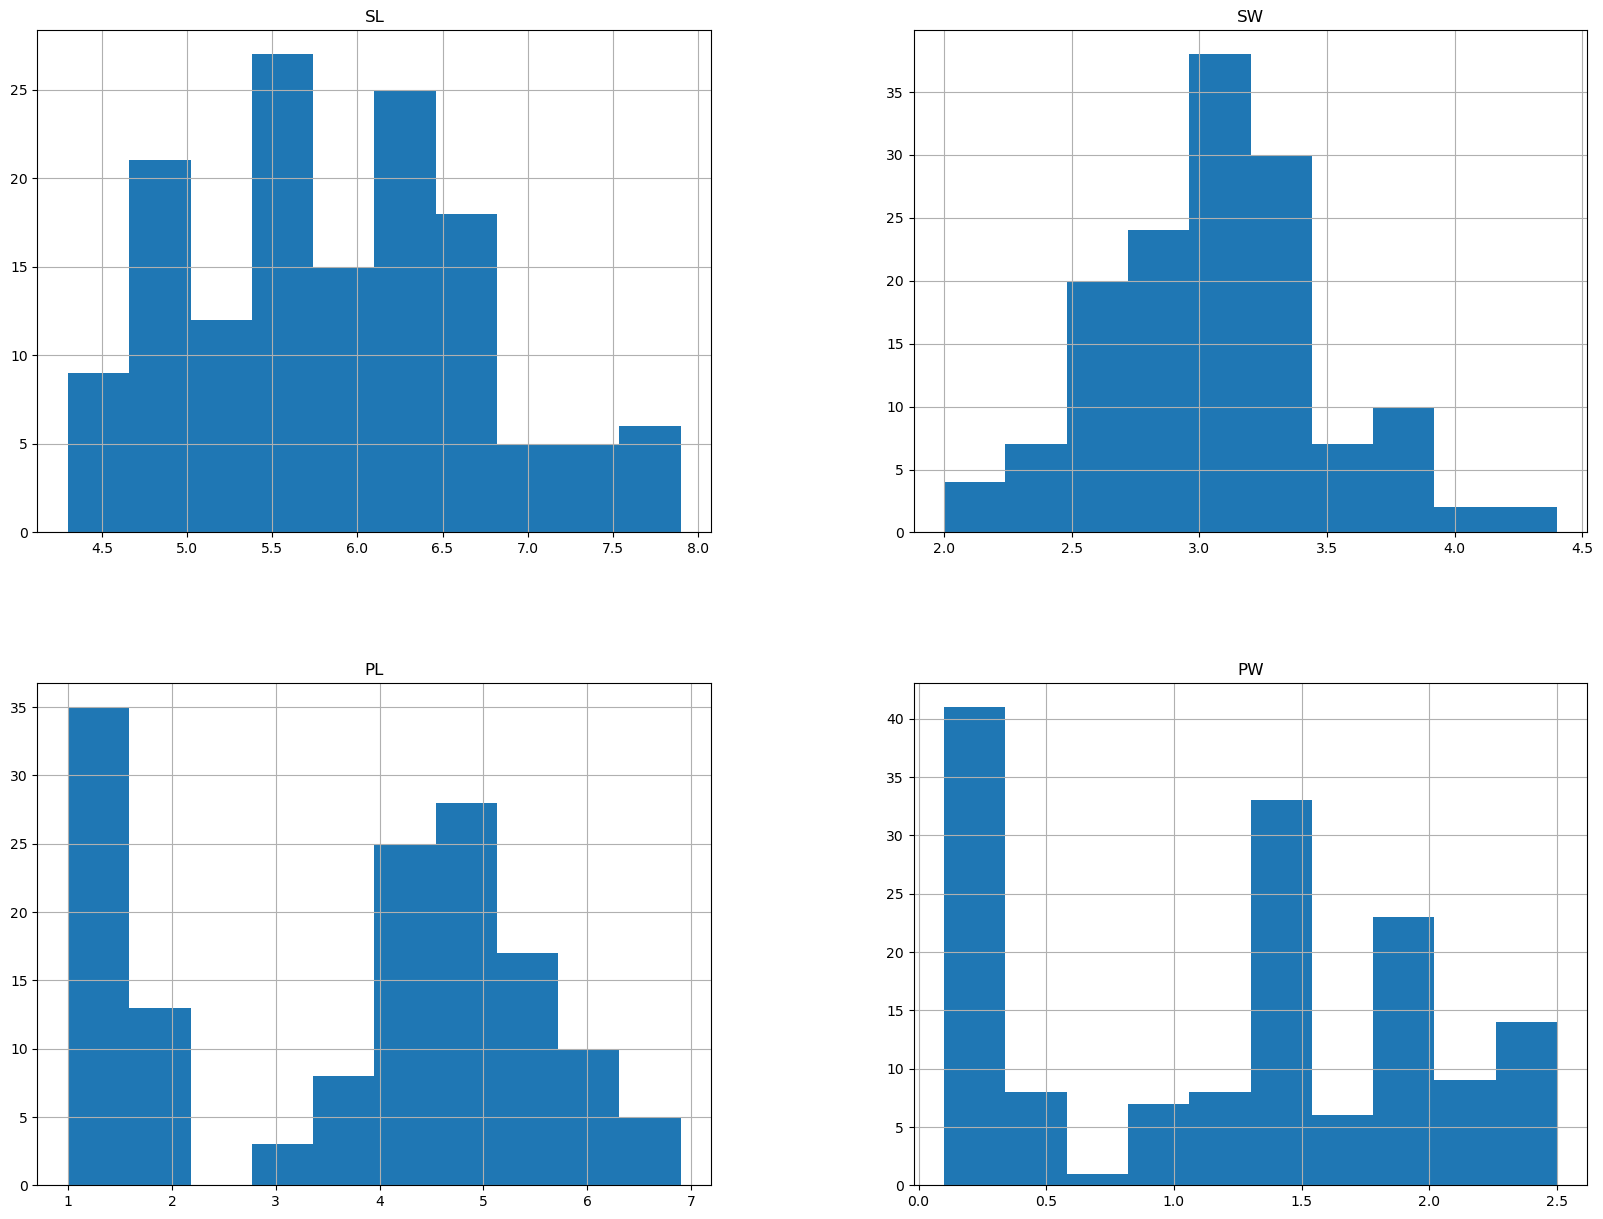

In [13]:
freqgraph = data.select_dtypes(include=['float']) 
freqgraph.hist(figsize=(20,15)) 
plt.show()

In [15]:
data['SL'] = data['SL'].fillna(data['SL'].median())

In [16]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [17]:
data['SW'] = data['SW'].fillna(data['SW'].median())

In [18]:
data['PL'] = data['PL'].fillna(data['PL'].median())

In [19]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#NO NULL VALUES HERE IN THE DATASET NOW

In [21]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [ ]:
#one hot encoding

In [22]:
data= pd.get_dummies(data)

In [23]:
data

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40,0.2,1,0,0
1,4.9,3.0,1.40,0.2,1,0,0
2,5.8,3.2,1.30,0.2,1,0,0
3,4.6,3.1,1.50,0.2,1,0,0
4,5.0,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1


In [40]:
y = data['Classification_Iris-setosa'] 
x = data.drop(['Classification_Iris-setosa'], axis =1)

In [41]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression() 
model = clf.fit(x_train,y_train)

In [43]:
y_pred = model.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
print('Accuracy = ' , accuracy_score(y_test,y_pred)) 
print('Precision = ' , precision_score(y_test,y_pred)) 
print('Recall = ' , recall_score(y_test,y_pred)) 
print('f1_score = ' , f1_score(y_test,y_pred))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1_score =  1.0


In [45]:
print(y_pred)

[0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1]


In [46]:
confusion_matrix(y_test, y_pred)

array([[20,  0],
       [ 0, 10]], dtype=int64)

In [47]:
y_test

73     0
18     1
118    0
78     0
76     0
31     1
64     0
141    0
68     0
82     0
110    0
12     1
36     1
9      1
19     1
56     0
104    0
69     0
55     0
132    0
29     1
127    0
26     1
128    0
131    0
145    0
108    0
143    0
45     1
30     1
Name: Classification_Iris-setosa, dtype: uint8

In [ ]:
#KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier 
metric_k = [] 
neighbors = np.arange(3,15) 


for k in neighbors: 
    classifier = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski',p=2) 
    model = classifier.fit(x_train,y_train) 
    y_pred = model.predict(x_test) 
    acc = accuracy_score(y_test,y_pred) 
    metric_k.append(acc)

C:\Users\sivap\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sivap\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [49]:
metric_k

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'accuracy')

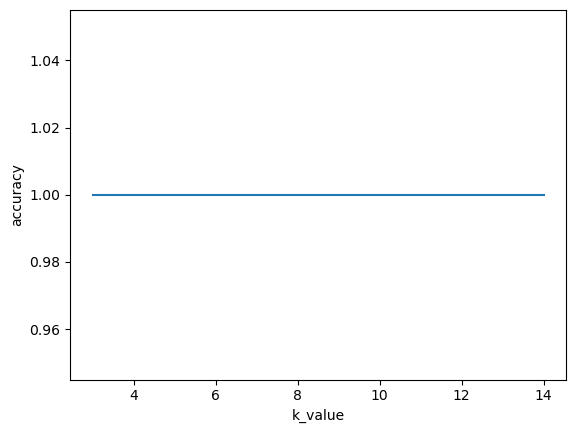

In [50]:
plt.plot(neighbors, metric_k) 
plt.xlabel('k_value') 
plt.ylabel('accuracy')

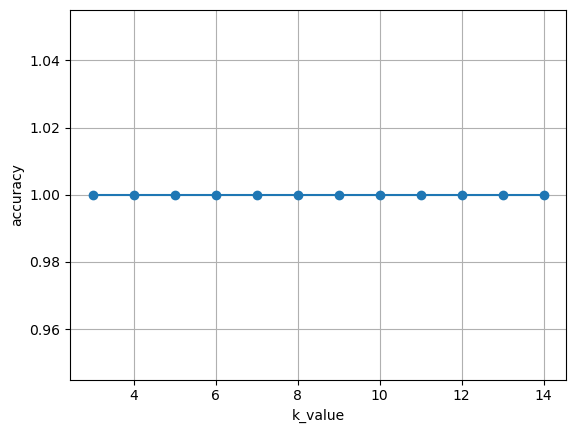

In [51]:
plt.plot(neighbors, metric_k, 'o-') 
plt.xlabel('k_value') 
plt.ylabel('accuracy') 
plt.grid()

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
print('Accuracy = ' , accuracy_score(y_test,y_pred)) 
print('Precision = ' , precision_score(y_test,y_pred)) 
print('Recall = ' , recall_score(y_test,y_pred)) 
print('f1_score = ' , f1_score(y_test,y_pred))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1_score =  1.0


In [53]:
confusion_matrix(y_test, y_pred)

array([[20,  0],
       [ 0, 10]], dtype=int64)

SVM

In [54]:
from sklearn.svm import SVC 
svmclf = SVC(kernel = 'linear') 
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [55]:
y_pred_svm = svmclf.predict(x_test) 

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [57]:
print('accuracy = ', accuracy_score(y_test,y_pred_svm))

accuracy =  1.0


In [58]:
print(confusion_matrix(y_test,y_pred_svm))

[[20  0]
 [ 0 10]]


In [59]:
from sklearn.svm import SVC 
svmclf = SVC(kernel = 'rbf') 
svmclf.fit(x_train,y_train)

SVC()

In [60]:
y_pred_svm = svmclf.predict(x_test) 

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [62]:
print('accuracy = ', accuracy_score(y_test,y_pred_svm))

accuracy =  1.0


In [63]:
print(confusion_matrix(y_test,y_pred_svm))

[[20  0]
 [ 0 10]]


In [64]:
from sklearn.svm import SVC 
svmclf = SVC(kernel = 'poly') 
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [65]:
y_pred_svm = svmclf.predict(x_test) 

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [67]:
print('accuracy = ', accuracy_score(y_test,y_pred_svm))

accuracy =  1.0


In [68]:
print(confusion_matrix(y_test,y_pred_svm))

[[20  0]
 [ 0 10]]


DECISION TREE

In [69]:
from sklearn.tree import DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
y_pred_dt = dt_clf.predict(x_test) 

In [71]:
print('accuracy = ', accuracy_score(y_test,y_pred_dt))

accuracy =  1.0


In [72]:
print(confusion_matrix(y_test,y_pred_dt))

[[20  0]
 [ 0 10]]


RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier 
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [74]:
y_pred_rf = rf_clf.predict(x_test) 

In [75]:
print('accuracy = ', accuracy_score(y_test,y_pred_rf))

accuracy =  1.0


In [76]:
print(confusion_matrix(y_test,y_pred_rf))

[[20  0]
 [ 0 10]]


In [77]:
from sklearn.ensemble import RandomForestClassifier 
rf_clf = RandomForestClassifier(n_estimators=80)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80)

In [78]:
y_pred_rf = rf_clf.predict(x_test) 

In [79]:
print('accuracy = ', accuracy_score(y_test,y_pred_rf))

accuracy =  1.0


In [80]:
print(confusion_matrix(y_test,y_pred_rf))

[[20  0]
 [ 0 10]]
